# K-Means Clustering

For this tutorial, we will implement the K-means clustering algorithm and apply it to compress an image..

# Motivation


Let's consider we have to transfer a high resoultion image over internet. It would take a lot of time to send if the network bandwidth is limilted. In these situations, it would be beneficial to compress the high resolution image so that it would be fast to transfer this image. 

![image](org_img1.png "240 x 180")


- Suppose the original image has $N$ pixels comprising {R, G, B} values each of which is stored with 8 bits of precision. 

  - **Original image memory requirement** = **???(Q1)** 

 **Q1 answer:** $N \times 3 \times 8 $ bits = $24 N$ bits

## Using K-Means clustering to compress the image. 

- Run K-means on the image
    - **Input** : Image
    - **Output** :
        - K cluster centers - **???(Q2)** how much memory is needed to store K cluster centers?  (in bits)
        - labels - **???(Q3)** how much memory is needed to store K cluster centers?  (in bits)
        

 **Q2 answer:**  $K \times 3 \times 8 $ bits = $24K$ bits
 
 **Q3 answer:**  $N \times log_2 K$ bits

# Example 

**Original image resolution:** $240 \times 180 $ pixels

|                 | Memory in bits (in Kb)|  compression ratio (%) |
|-----------------|:-------------| :-------------|
| Original img    | 1, 036, 800  (129.6)   | 100 |
| K-means (K=2)   | 43, 248     (5.4)     | 4.2 |
| K-means (K=3)   | 86, 472     (10.8)    | 8.3 |
| K-means (K=10)  | 173, 040    (21.6)    | 16.7|

![image](segmentation.png)


# K-Means

## 1. Implementing K-Means

> The K-means algorithm is a method to automatically cluster similar data examples together. The intuition behind K-means is an iterative procedure that starts by guess- ing the initial centroids, and then refines this guess by repeatedly assigning examples to their closest centroids and then recomputing the centroids based on the assignments

**Algorithm**

In the clustering problem, we are given a training set ${y_{1}, ... , y_{m}}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $y_{i} \in \mathbb{R}^n$ as usual; but no labels (making this an unsupervised learning problem). 

Our goal is to predict $K$ centroids and a label for each datapoint. The k-means clustering algorithm is as follows:


![image](K-means_algo.png)


# Required python libraries

- scipy : to read mat files
- numpy : for array operations
- matplotlib, seaborn : for plotting and visualizations
- opencv : for image loading image data

## Installation

> pip install scipy numpy matplotlib seaborn opencv-python

In [1]:
pip install scipy numpy matplotlib seaborn opencv-python

Note: you may need to restart the kernel to use updated packages.


### 1.1. Update labels

***Finding Closest Centroids***

For every example $i$, we get j that minimizes $||y_{i}-c_j||^2$ where $c_{j}$ is the centroid that is closest to $y_{i}$, and $c_j$ is the position (value) of the j'th centroid.

In [2]:
import scipy.io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def find_closest_centroid(Y, centroids):
    """ This function finds the nearest centroid for each data point y^i.
    Args:
    - Y (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs.
        Each row correspond to an input data point.
    - centroids (ndarray (Shape: (K, D))): A KxD matrix corresponding to the centroids.
        Each row correspond to a centroid

    Output:
    - idx (ndarray (Shape: (N, 1))): A N-column vector containing the index of the nearest cluster.
    """

    ## your code
    idx = np.array([np.argmin(np.linalg.norm(y - centroids, axis=1)) for y in Y], dtype=int) + 1
    return idx

# from K_means_funs import find_closest_centroid

In [4]:
mat = scipy.io.loadmat('K-Means-data1.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y'])

In [5]:
print('shape', mat['Y'].shape)
mat['Y'][0:3]

shape (300, 2)


array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ]])

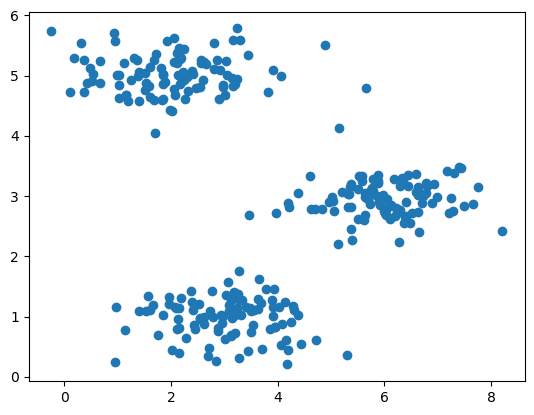

In [6]:
plt.scatter(mat['Y'][:,0], mat['Y'][:,1])
plt.show()

In [7]:
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])
idx = find_closest_centroid(mat['Y'], initial_centroids)
print('Closest centroids for the first 3 examples:', idx[:3].T)
print('(the closest centroids should be 1, 3, 2 respectively)')

Closest centroids for the first 3 examples: [1 3 2]
(the closest centroids should be 1, 3, 2 respectively)


### 1.2. Update centers

***Computing Centroid Means***

Given assignments of every point to a centroid, the second phase of the algorithm recomputes, for each centroid, the mean of the points that were assigned to it. Specifically, for every centroid j we set $c_j := \frac{1}{|C_j|}\sum_{i \in C_j}y_{i}$

In [8]:
def compute_centroids(Y, idx, K):
    """ This function finds the centroids for each cluster.
    Args:
    - Y (ndarray (Shape: (N, D))): A NxD matrix corresponding to the inputs.
        Each row correspond to an input data point.
    - idx (ndarray (Shape: (N, 1))): A N-column vector containing the index of the nearest cluster.
    - K (int) : number of clusters

    Output:
    - centroids (ndarray (Shape: (K, D))): A KxD matrix corresponding to the centroids.
        Each row correspond to a centroid
    """

    ## your code
    centroids = np.array([np.mean(Y[idx == k], axis=0) for k in range(1, K + 1)], dtype=float)
    return centroids

# from K_means_funs import compute_centroids

In [9]:
centroids = compute_centroids(mat['Y'], idx, K)
print('Centroids computed after initial finding of closest centroids: \n', centroids)
print('\n(the centroids should be\n [ 2.428301 3.157924 ]\n[ 5.813503 2.633656 ]\n[ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids: 
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

(the centroids should be
 [ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]


### 1.3 Random initialization

In [10]:
def init_random_centroids(Y, K):
    centroids = Y[(np.random.choice(Y.shape[0], K)), :]
    return centroids

## 2. K-Means on example dataset

In [11]:
def plot_kmeans(X, centroids, previous, idx, K, axes):
    for i, ax in enumerate(axes):
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=idx.ravel(), legend=False, palette=['r', 'g', 'b'], ax=ax)
        if i==0:
            sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='X', color='k', legend=False, s=100, ax=ax)
        else:
            sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='X', color='k', legend=False, s=100, ax=ax)
        for i in range(centroids.shape[0]):
            ax.plot([centroids[i,0], previous[i,0]], [centroids[i,1], previous[i,1]], '--k');

In [12]:
def kmeans(X, initial_centroids, max_iters, plot_progress):

    # plotting
    if plot_progress:
        ncols = 3
        nrows = int(max_iters/ncols)
        if max_iters % ncols > 0:
            nrows = nrows + 1
        fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,nrows*8))
        ax_tuple = list(np.ndindex(nrows,ncols))
        for ax in ax_tuple[max_iters:]:
            axes[ax].set_axis_off()
        ax_tuple = ax_tuple[:max_iters]

    ## K-means initialization
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids

    for i in range(max_iters):
        ## Update labels
        # Finding Closest Centroids
        idx = find_closest_centroid(X, centroids)

        if plot_progress:
            plot_axes = [axes[axi] for axi in ax_tuple[i:]]
            axes[ax_tuple[i]].set_title('K-Means iteration {0}/{1}'.format(i+1, max_iters))
            plot_kmeans(X, centroids, previous_centroids, idx, K, plot_axes)
            previous_centroids = centroids
            previous_ax = plt.gca()
        else:
            print('K-Means iteration {0}/{1}'.format(i+1, max_iters))

        # Update centroids
        centroids = compute_centroids(X, idx, K)

    if plot_progress:
        plt.show()
    return centroids, idx

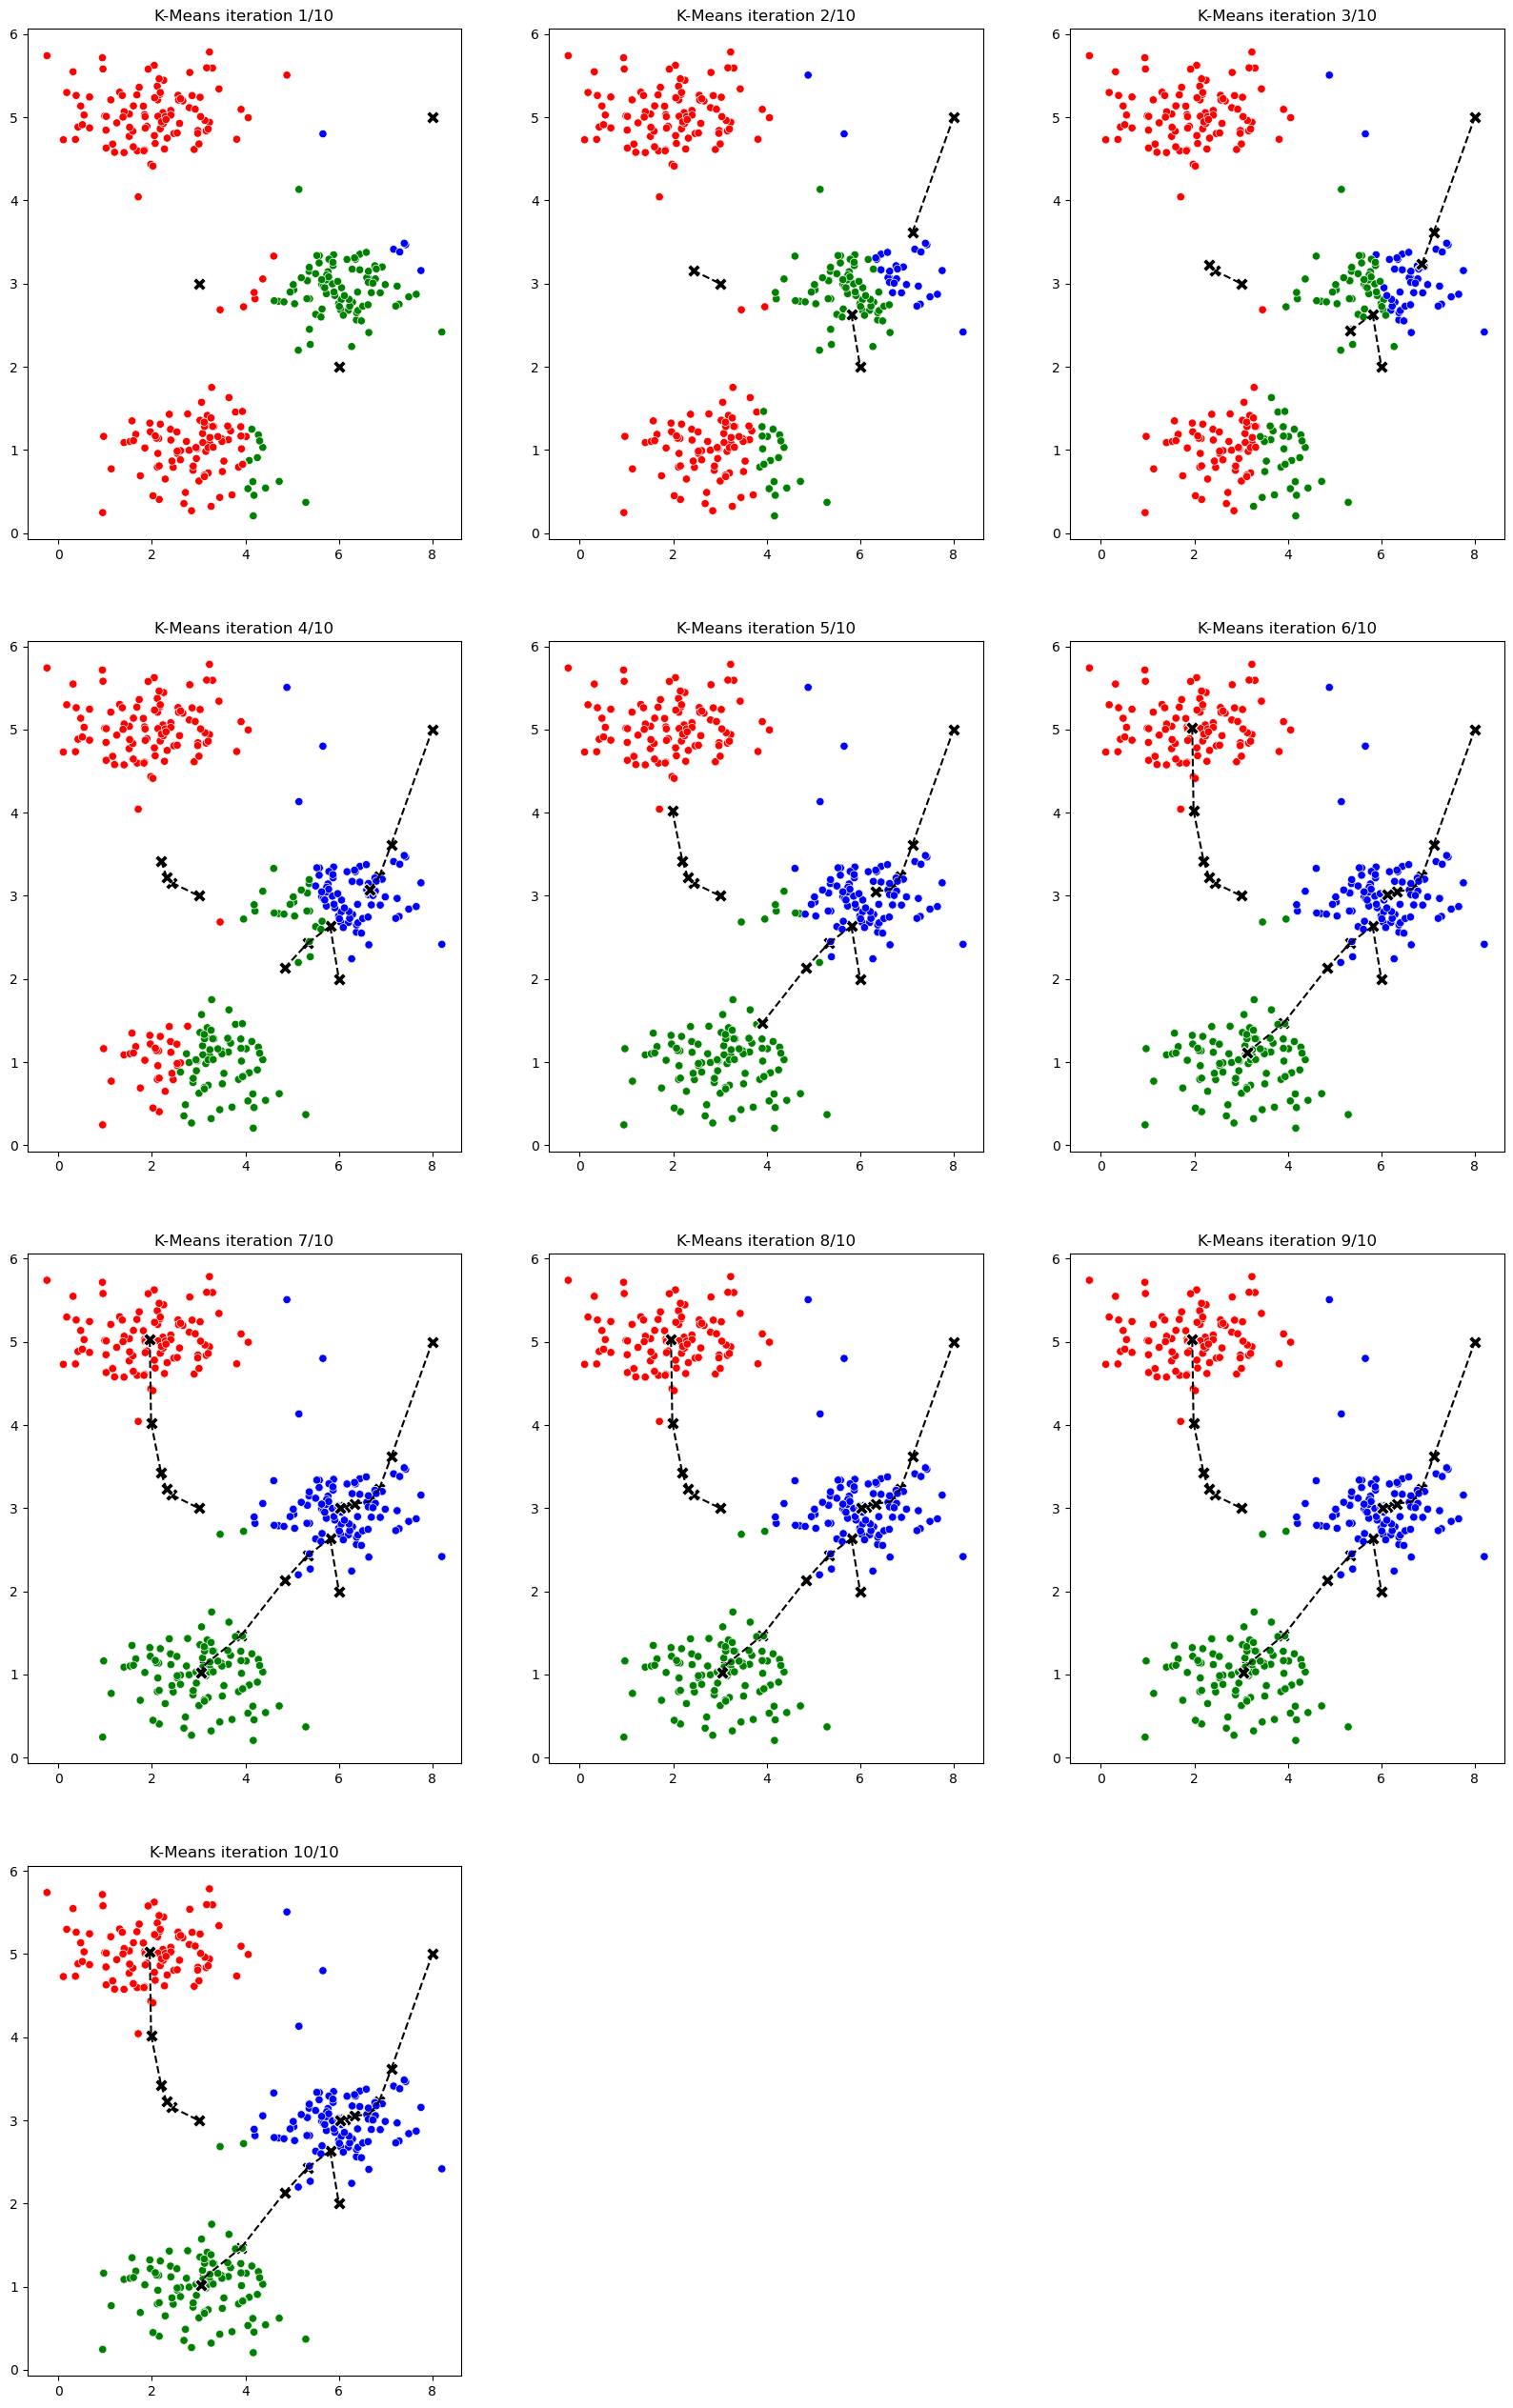

In [13]:
K = 3
max_iters = 10
initial_centroids = np.array([[3,3],[6,2],[8,5]])
centroids, idx = kmeans(mat['Y'], initial_centroids, max_iters, True)

## 3. Image Compression with K-means

> In this exercise, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image. Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3-dimensional RGB space. Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

#### 3.1 K-means on pixels

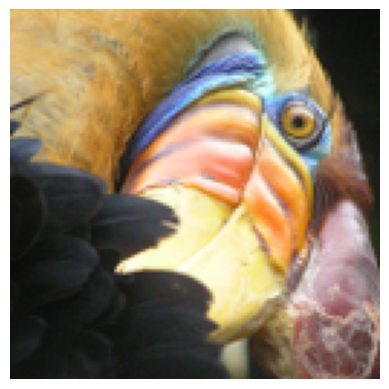

In [14]:
import cv2
img = cv2.imread('bird_small.png')
plt.axis('off');
plt.imshow(img[:,:,::-1]);

In [15]:
print(f'max value:{img.max()}, min value:{img.min()}')
A = img[:,:,::-1]
A = np.divide(img, 255) #get all values in range 0-1
print(f'max value:{A.max()}, min value:{A.min()}')

max value:255, min value:6
max value:1.0, min value:0.023529411764705882


In [16]:
A.shape

(128, 128, 3)

In [17]:
A = A.reshape((A.shape[0]*A.shape[1], 3))
A.shape

(16384, 3)

##### Run K-Means

In [18]:
K = 16
max_iters = 10
initial_centroids = init_random_centroids(A, K)
centroids, idx = kmeans(A, initial_centroids, max_iters, False)

K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10


##### Apply K-Means to compress an image

In [19]:
idx = find_closest_centroid(A, centroids)
idx = idx.astype(int)

In [20]:
idx.shape

(16384,)

In [21]:
X_recovered = np.zeros((idx.shape[0], 3))
for i in range(idx.shape[0]):
    X_recovered[i,:] = centroids[idx[i]-1,:]

In [22]:
X_recovered = X_recovered.reshape((img.shape[0], img.shape[1], 3))

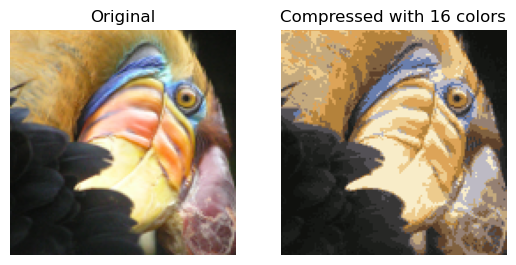

In [23]:
plt.subplot(1,2,1)
plt.axis('off');
plt.title('Original')
plt.imshow(img[:,:,::-1]);

plt.subplot(1,2,2)
plt.axis('off');
plt.title('Compressed with 16 colors')
plt.imshow(X_recovered[:,:,::-1]);

In [24]:
# K_vals = [2, 8, 16, 24, 36]
K_vals = [2, 3, 10, 16]
max_iters = 10

imgs_compressed = []
for ik,K in enumerate(K_vals):
    print('\nRunning K-Means with K={}'.format(K))
    #run kmeans
    initial_centroids = init_random_centroids(A, K)
    centroids, idx = kmeans(A, initial_centroids, max_iters, False)
    #image compression
    idx = find_closest_centroid(A, centroids)
    idx = idx.astype(int)
    #recover image
    X_recovered = np.zeros((idx.shape[0], 3))
    for i in range(idx.shape[0]):
        X_recovered[i,:] = centroids[idx[i]-1,:]
    X_recovered = X_recovered.reshape((img.shape[0], img.shape[1], 3))
    imgs_compressed.append(X_recovered)


Running K-Means with K=2
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=3
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=10
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration 9/10
K-Means iteration 10/10

Running K-Means with K=16
K-Means iteration 1/10
K-Means iteration 2/10
K-Means iteration 3/10
K-Means iteration 4/10
K-Means iteration 5/10
K-Means iteration 6/10
K-Means iteration 7/10
K-Means iteration 8/10
K-Means iteration

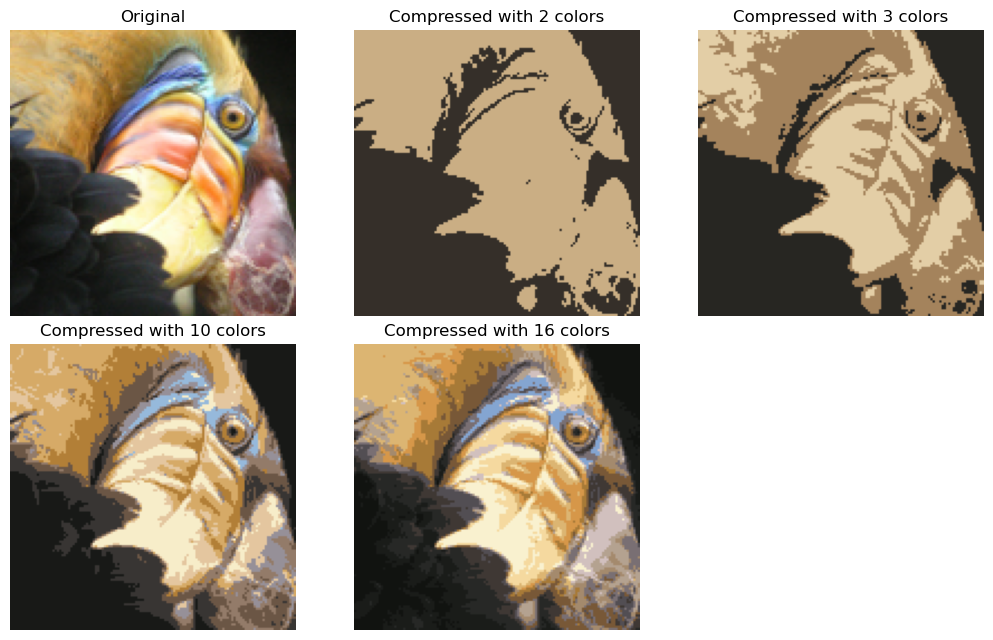

In [25]:
fig = plt.figure(figsize=(10,6))
rows = 2
cols = 3
ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(img[:,:,::-1])
ax1.set_axis_off()
ax1.set_title('Original')
for i in range(len(imgs_compressed)):
    ax1 = fig.add_subplot(rows, cols, i+2)
    ax1.imshow(imgs_compressed[i][:,:,::-1])
    ax1.set_axis_off()
    ax1.set_title('Compressed with {} colors'.format(K_vals[i]))
plt.subplots_adjust(wspace=.1, hspace=.1, left=0, right=1, bottom=0, top=1)
plt.show()